In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import AdaBoostClassifier

In [2]:
penguins = pd.read_csv("./datasets/penguins_classification.csv")
culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

data, target = penguins[culmen_columns], penguins[target_column]

In [3]:
palette = ["tab:red", "tab:blue", "black"]

tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(data, target)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [4]:
target_predicted = tree.predict(data)
misclassified_samples_idx = np.flatnonzero(target != target_predicted)
data_misclassified = data.iloc[misclassified_samples_idx]

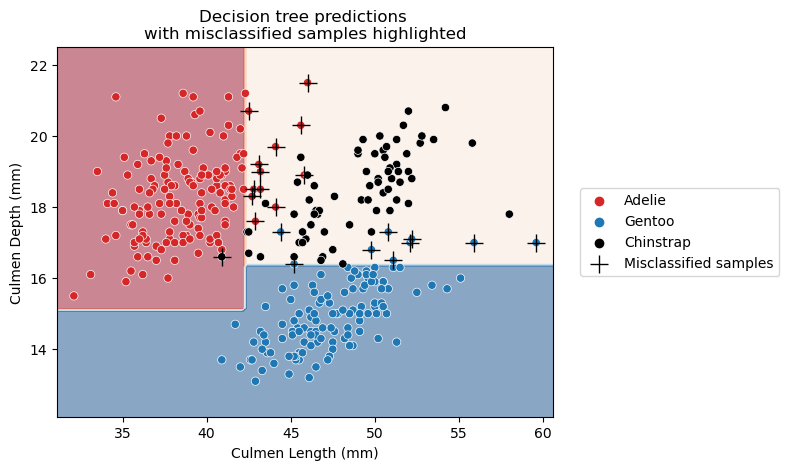

In [5]:
DecisionBoundaryDisplay.from_estimator(
    tree, data, response_method="predict", cmap="RdBu", alpha=0.5
)

# plot the original dataset
sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette,
)
# plot the misclassified samples
sns.scatterplot(
    data=data_misclassified,
    x=culmen_columns[0],
    y=culmen_columns[1],
    label="Misclassified samples",
    marker="+",
    s=150,
    color="k",
)

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
_ = plt.title(
    "Decision tree predictions \nwith misclassified samples highlighted"
)

In [6]:
sample_weight = np.zeros_like(target, dtype=int)
sample_weight[misclassified_samples_idx] = 1

tree = DecisionTreeClassifier(max_depth=2, random_state=0)
tree.fit(data, target, sample_weight=sample_weight)

DecisionTreeClassifier(max_depth=2, random_state=0)

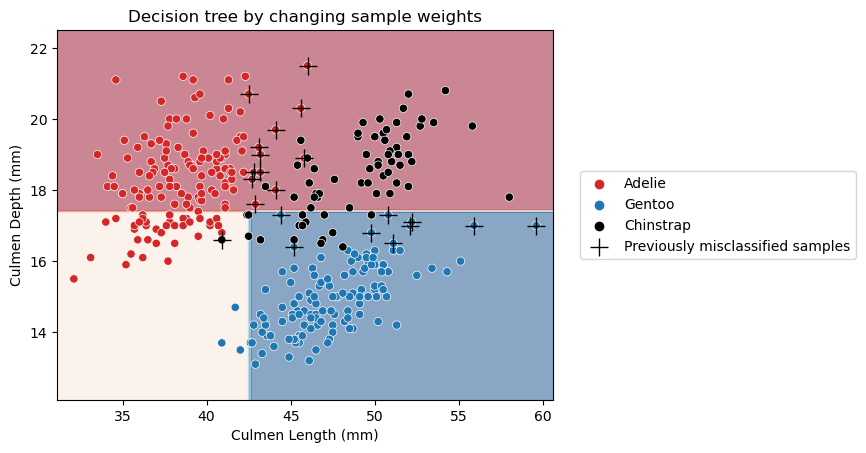

In [7]:
DecisionBoundaryDisplay.from_estimator(
    tree, data, response_method="predict", cmap="RdBu", alpha=0.5
)
sns.scatterplot(
    data=penguins,
    x=culmen_columns[0],
    y=culmen_columns[1],
    hue=target_column,
    palette=palette,
)
sns.scatterplot(
    data=data_misclassified,
    x=culmen_columns[0],
    y=culmen_columns[1],
    label="Previously misclassified samples",
    marker="+",
    s=150,
    color="k",
)

plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
_ = plt.title("Decision tree by changing sample weights")

In [8]:
target_predicted = tree.predict(data)
newly_misclassified_samples_idx = np.flatnonzero(target != target_predicted)
remaining_misclassified_samples_idx = np.intersect1d(
    misclassified_samples_idx, newly_misclassified_samples_idx
)

print(
    "Number of samples previously misclassified and "
    f"still misclassified: {len(remaining_misclassified_samples_idx)}"
)

Number of samples previously misclassified and still misclassified: 0


In [9]:
ensemble_weight = [
    (target.shape[0] - len(misclassified_samples_idx)) / target.shape[0],
    (target.shape[0] - len(newly_misclassified_samples_idx)) / target.shape[0],
]
ensemble_weight

[0.935672514619883, 0.6929824561403509]

In [10]:
estimator = DecisionTreeClassifier(max_depth=3, random_state=0)
adaboost = AdaBoostClassifier(
    estimator=estimator, n_estimators=3, algorithm="SAMME", random_state=0
)
adaboost.fit(data, target)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=0),
                   n_estimators=3, random_state=0)

<Figure size 640x480 with 0 Axes>

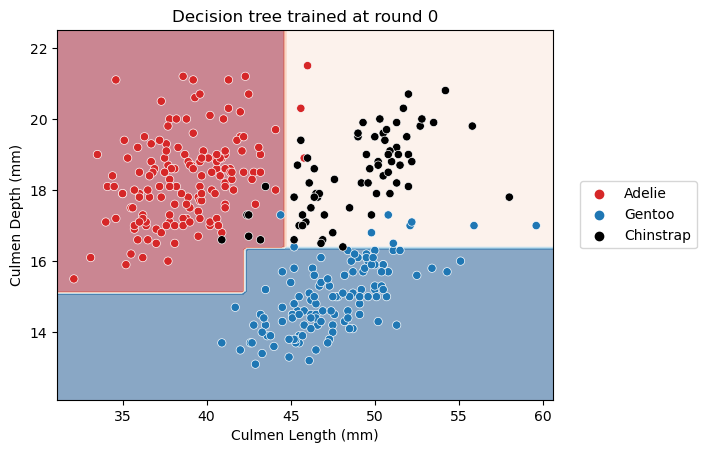

<Figure size 640x480 with 0 Axes>

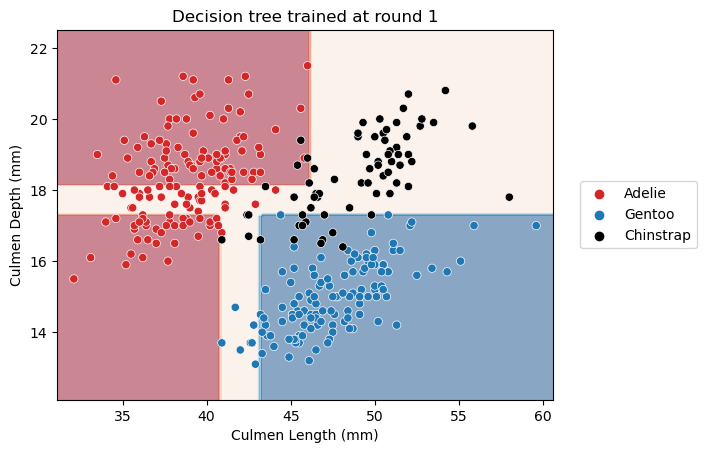

<Figure size 640x480 with 0 Axes>

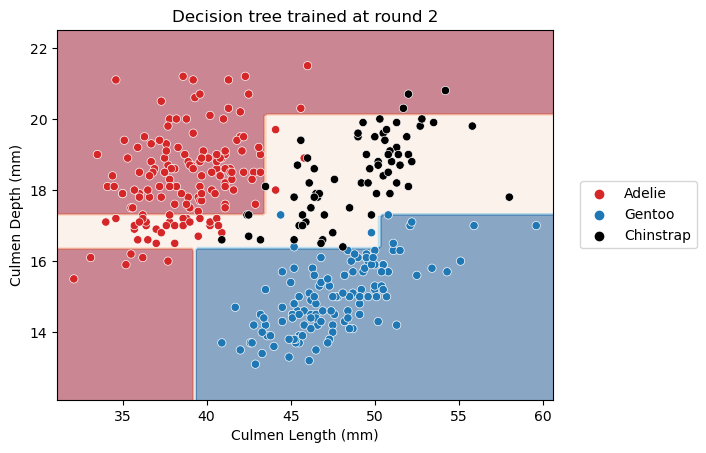

In [11]:
for boosting_round, tree in enumerate(adaboost.estimators_):
    plt.figure()
    # we convert `data` into a NumPy array to avoid a warning raised in scikit-learn
    DecisionBoundaryDisplay.from_estimator(
        tree,
        data.to_numpy(),
        response_method="predict",
        cmap="RdBu",
        alpha=0.5,
    )
    sns.scatterplot(
        x=culmen_columns[0],
        y=culmen_columns[1],
        hue=target_column,
        data=penguins,
        palette=palette,
    )
    plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")
    _ = plt.title(f"Decision tree trained at round {boosting_round}")